<b><H1>Project Name : Lending Club Loan Data Analysis</H1></b><br>
Name: Daniel Manova<br>
Date: 17-07-2021<br>
Course: Post Graduate Program in AI and Machine Learning<br>
Cohort : PGP AIML FEB 2021 Cohort 1<br>

<b>Lending Club Loan Data Analysis</b>

<b>Description:</b> Create a model that predicts whether or not a loan will be default using the historical data.

<b>Problem Statement:</b>  
For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

<b>Domain:</b> Finance

<b>Analysis to be done:</b> Perform data preprocessing and build a deep learning prediction model. 

<b>Steps to perform:</b> Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

<b>Tasks:</b>
1. Feature Transformation
        i. Transform categorical values into numerical values (discrete)
2. Exploratory data analysis of different factors of the dataset.
3. Additional Feature Engineering
        i. You will check the correlation between features and will drop those features which have a strong correlation
        ii. This will help reduce the number of features and will leave you with the most relevant features
4. Modeling
        i. After applying EDA and feature engineering, you are now ready to build the predictive models
        ii. In this part, you will create a deep learning model using Keras with Tensorflow backend

In [1]:
#Initialize all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization, Reshape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import warnings

# Feature Engineerin

In [2]:
#Read the data and display top 5 rows
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
#Describing the dataset
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
#Displaying the datatypes fo each feature
print(f"\033[1mData types:\033[0m\n{12 * '-'}")
print(df.dtypes)

Data types:
------------
credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [5]:
#Check if there are any null value in each feature
print(f"\033[1mSum of null values in each feature:\033[0m\n{35 * '-'}")
print(df.isnull().sum())

Sum of null values in each feature:
-----------------------------------
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [6]:
#Displating the unique features of purpose column
print(df['purpose'].unique())

['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


# Exploratory Data Analysis on different factors of the dataset

<b>Purpose wise splitup</b>

In [7]:
#Supress filter warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

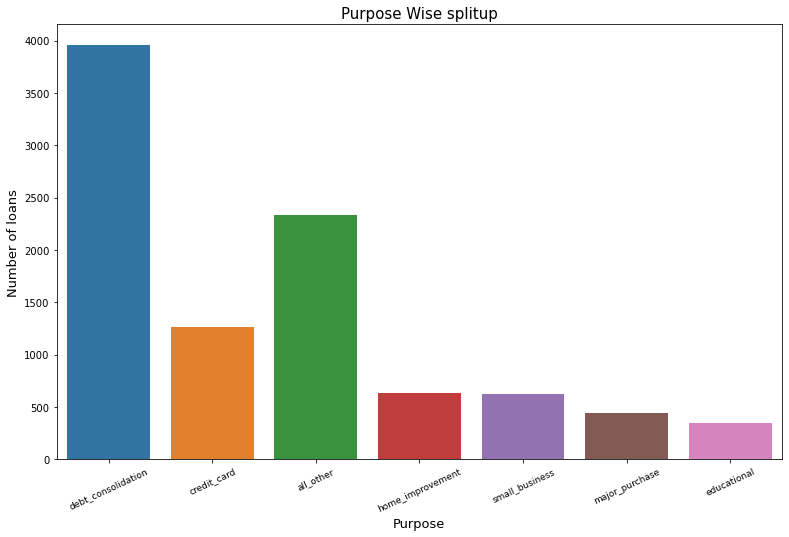

In [8]:
plt.figure(figsize=(13,8))
sns.countplot(df['purpose'])
plt.title("Purpose Wise splitup", y=1, fontdict={"fontsize": 15})
plt.ylabel("Number of loans", fontsize = 13)
plt.xlabel("Purpose", fontsize = 13)
plt.xticks(rotation = 25, fontsize = 9)
plt.show()
plt.show()

<b>Observation:</b> Loan request for debt consolidation is comparively high and followed by credit cards

<b>Identifying Risky Loans</b>

In [9]:
#Listing risky loans
risky_loans = df[df["credit.policy"]==0]
risky_loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7710,0,debt_consolidation,0.1608,35.20,10.308953,23.84,642,2490.000000,10125,90.4,1,0,0,0
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1
7712,0,debt_consolidation,0.1600,787.53,11.264464,19.34,682,3780.041667,15897,66.0,5,0,1,0
7713,0,educational,0.1640,126.40,10.308953,29.60,677,1643.000000,3043,58.5,1,0,0,1
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1


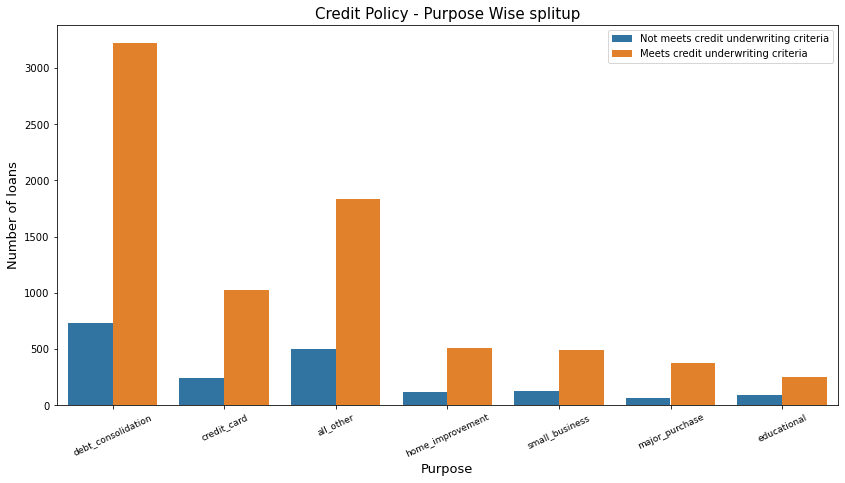

In [10]:
#Credit Policy - Purpose Wise splitup
plt.figure(figsize=(14,7))
ax = sns.countplot(x='purpose',hue='credit.policy',data=df)
plt.xticks(rotation = 25, fontsize = 9)
plt.ylabel("Number of loans", fontsize = 13)
plt.xlabel("Purpose", fontsize = 13)
plt.legend(["Not meets credit underwriting criteria", "Meets credit underwriting criteria"])
plt.title("Credit Policy - Purpose Wise splitup", fontdict={"fontsize": 15})
plt.show()

In [11]:
# Calculating Risky and Safe ration and count of loans by purpose
tot_count_of_loans_by_purpose = df.groupby(["purpose"])["credit.policy"].count().reset_index()
tot_count_of_risky_loans_by_purpose = df[df["credit.policy"]==0].groupby(["purpose"])["credit.policy"].count().reset_index()
tot_count_of_safe_loans_by_purpose = df[df["credit.policy"]==1].groupby(["purpose"])["credit.policy"].count().reset_index()

risky_vs_safe_ratio_by_purpose = pd.merge(tot_count_of_risky_loans_by_purpose,tot_count_of_safe_loans_by_purpose, on = 'purpose', suffixes = ('_x', '_y'))
total_ratio_by_purpose= pd.merge(risky_vs_safe_ratio_by_purpose,tot_count_of_loans_by_purpose, on = 'purpose', suffixes = ('_x', '_y'))

total_ratio_by_purpose.columns = ["purpose", "Risky","Safe","Total"]
total_ratio_by_purpose["Risk Ratio"] = round(total_ratio_by_purpose["Risky"]/total_ratio_by_purpose["Total"]*100,2)
total_ratio_by_purpose["Safe Ratio"] = round(total_ratio_by_purpose["Safe"]/total_ratio_by_purpose["Total"]*100,2)

print(f"\033[1mRisk and Safe Loans Count and Ration:\033[0m\n{37 * '-'}") 
display(total_ratio_by_purpose)


Risk and Safe Loans Count and Ration:
-------------------------------------


,purpose,Risky,Safe,Total,Risk Ratio,Safe Ratio
0,all_other,496,1835,2331,21.28,78.72
1,credit_card,242,1020,1262,19.18,80.82
2,debt_consolidation,734,3223,3957,18.55,81.45
3,educational,89,254,343,25.95,74.05
4,home_improvement,117,512,629,18.60,81.40
5,major_purchase,66,371,437,15.10,84.90
6,small_business,124,495,619,20.03,79.97


<b>Observation:</b> About <font color="red">25.95%</font> of the education purpose loans are termed  <font color="red">Risky</font> followed by all other purposes with <font color="red">21.28%</font> and small business with <font color="red">20.03%</font>

In [12]:
df.groupby("credit.policy").agg({'int.rate':['mean','median']})

int.rate        
                   mean  median
credit.policy                  
0              0.138680  0.1387
1              0.118754  0.1189

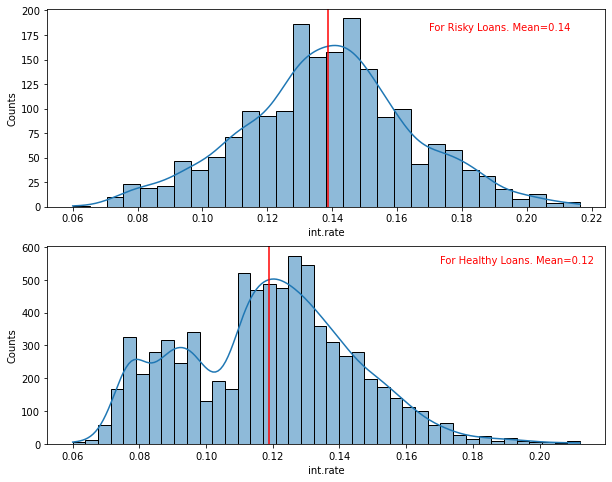

In [13]:
#Fetch the average Interest rate with respective to credit polict
fig = plt.figure(figsize = (10,8))

ax1 = plt.subplot(211)
sns.histplot(df[df["credit.policy"]==0]["int.rate"], kde = True)
plt.axvline(x = df[df["credit.policy"]==0]["int.rate"].mean(), color = 'r') # Mean line
plt.ylabel("Counts")
plt.text(0.17,180,"For Risky Loans. Mean={}".format(round(df[df["credit.policy"]==0]["int.rate"].mean(),2)), fontsize =10,color='r')


ax2 = plt.subplot(212)
sns.histplot(df[df["credit.policy"]==1]["int.rate"], kde = True)
plt.axvline(x = df[df["credit.policy"]==1]["int.rate"].mean(), color = 'r') # Mean line
plt.ylabel("Counts")
plt.text(0.17,550,"For Healthy Loans. Mean={}".format(round(df[df["credit.policy"]==1]["int.rate"].mean(),2)), fontsize =10,color='r')

plt.show()

<b>Observation:</b> The average interest rate for the risky loans is about 2% higher than the healthy loans.

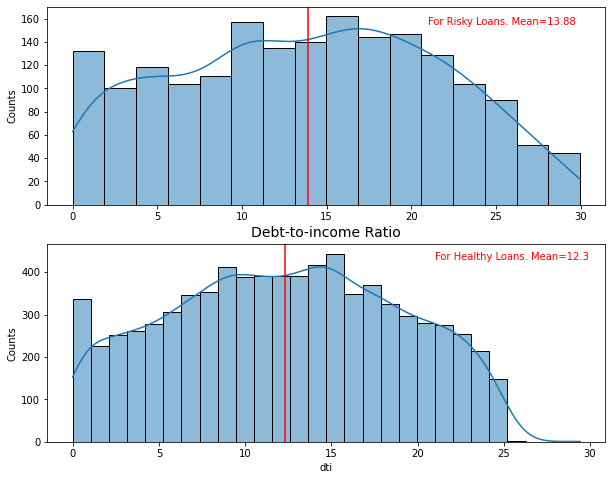

In [14]:
fig = plt.figure(figsize = (10,8))

ax1 = plt.subplot(211)
sns.histplot(df[df["credit.policy"]==0]["dti"], kde = True)
plt.axvline(x = df[df["credit.policy"]==0]["dti"].mean(), color = 'r') # Mean line
plt.ylabel("Counts")
plt.xlabel("Debt-to-income Ratio", fontsize = 14)
plt.text(21,155,"For Risky Loans. Mean={}".format(round(df[df["credit.policy"]==0]["dti"].mean(),2)), fontsize =10,color='r')

ax2 = plt.subplot(212)
sns.histplot(df[df["credit.policy"]==1]["dti"], kde = True)
plt.axvline(x = df[df["credit.policy"]==1]["dti"].mean(), color = 'r') # Mean line
plt.ylabel("Counts")
plt.text(21,430,"For Healthy Loans. Mean={}".format(round(df[df["credit.policy"]==1]["dti"].mean(),2)), fontsize =10,color='r' )

plt.show()

<b>Observation:</b>The Debt to Income ratio is higher for the Risky loans.

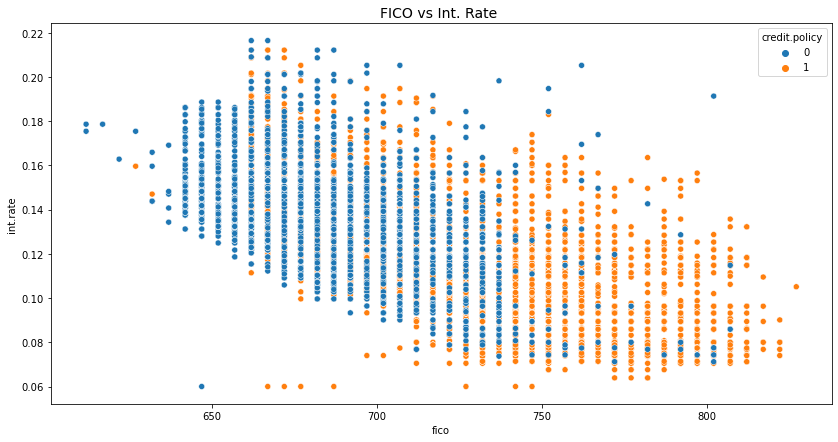

In [15]:
#Credit Policy - Purpose Wise splitup
plt.figure(figsize=(14,7))
ax = sns.scatterplot(x='fico',y='int.rate',hue = "credit.policy",data=df)
plt.title("FICO vs Int. Rate ", fontsize = 14)
plt.show()

<b>Observation:</b> The higher the FICO score, the lower the interest rates. Also, the higher credit score have better risk credibility. However, there are a few cases where lower interest rates were offered even though the FICO score was very poor. One possibility is if there hase been a compromise to adhere to the policy of loan disbursement and favours been granted.
<i>For the sake of analysis, any FICO lower than 735 can be deened as poor credit score.</i>

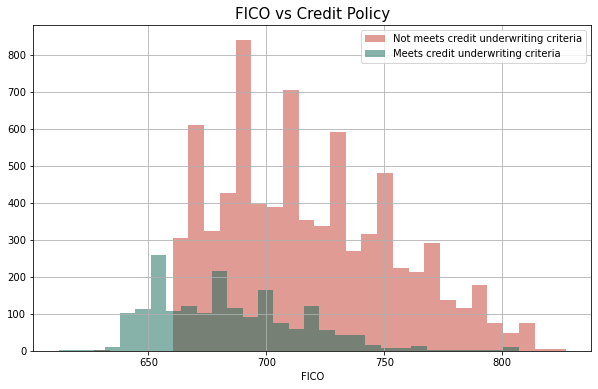

In [16]:
#FICO VS Credit Policy
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='#C0392B',bins=30,label='Credit.Policy=1')  
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='#0E6655',bins=30,label='Credit.Policy=0')
plt.xlabel('FICO')
plt.title("FICO vs Credit Policy", y=1, fontdict={"fontsize": 15})
plt.legend(["Not meets credit underwriting criteria", "Meets credit underwriting criteria"])
plt.show()

<b>Not fully paid analysis</b>

Positive examples = 1533
Negative examples = 8045
Proportion of positive to negative examples = 19.06%


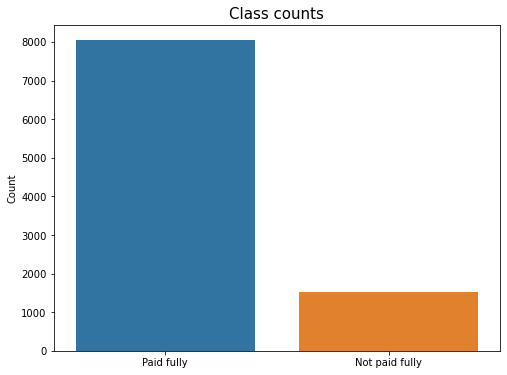

In [17]:
# Get number of positve and negative examples
pos = df[df["not.fully.paid"] == 1].shape[0]
neg = df[df["not.fully.paid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(df["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts",fontdict={"fontsize": 15})
plt.show()

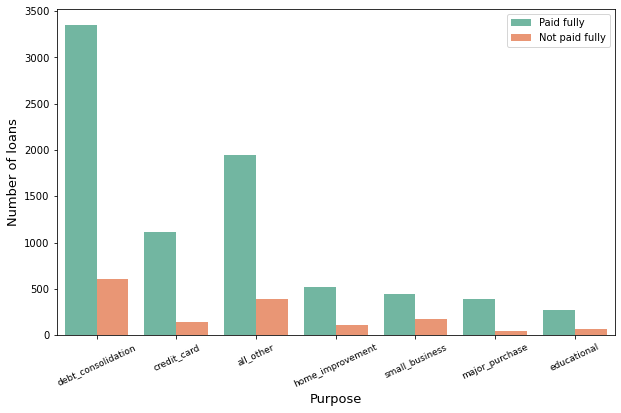

In [18]:
#Not Fully Paid - Purpose wise splitup
plt.figure(figsize=(10,6))
ax = sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set2')
plt.legend(["Paid fully", "Not paid fully"])
plt.xticks(rotation = 25, fontsize = 9)
plt.ylabel("Number of loans", fontsize = 13)
plt.xlabel("Purpose", fontsize = 13)
plt.show()

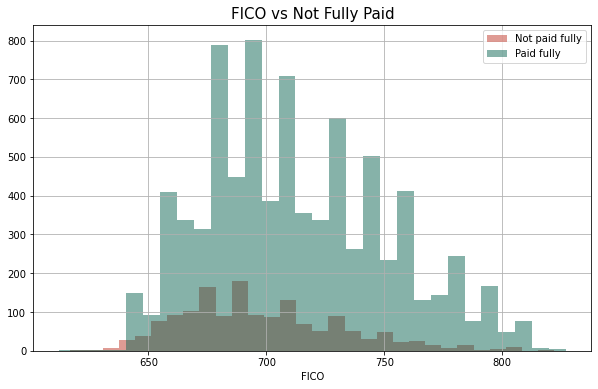

In [19]:
#FICO vs Not Fully paid
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='#C0392B',bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='#0E6655',bins=30,label='not.fully.paid=0')
plt.legend(["Not paid fully","Paid fully"])
plt.xlabel('FICO')
plt.title("FICO vs Not Fully Paid", y=1, fontdict={"fontsize": 15})
#plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.show()

<b>Check for Correlation between features</b>

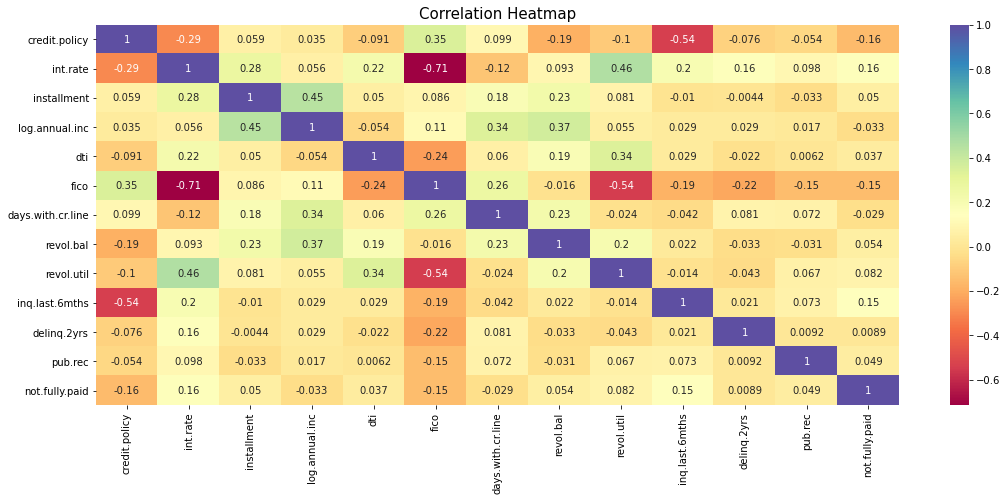

In [20]:
#Correlation with the available data
corr = df.corr()
plt.figure(figsize=(18,7))
sns.heatmap(corr,cmap='Spectral',annot=True)
plt.title("Correlation Heatmap", y=1, fontdict={"fontsize": 15})
plt.show()

In [21]:
#correlation - absolute values
cor_mtx = df.corr().abs()
print(cor_mtx)

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000  0.294089     0.058770        0.034906   
int.rate                0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                     0.090901  0.220006     0.050202        0.054065   
fico                    0.348319  0.714821     0.086039        0.114576   
days.with.cr.line       0.099026  0.124022     0.183297        0.336896   
revol.bal               0.187518  0.092527     0.233625        0.372140   
revol.util              0.104095  0.464837     0.081356        0.054881   
inq.last.6mths          0.535511  0.202780     0.010419        0.029171   
delinq.2yrs             0.076318  0.156079     0.004368        0.029203   
pub.rec                 0.054243  0.098162     0.032760        0.016506   
not.fully.paid          0

<b>Observation:</b> There are no strong correlation between features and hence not dropping any features from dataset

# Feature Engineerin - Transform categorical values into numerical values

In [22]:
# Create dummy variables from the feature purpose and displaying
df = pd.get_dummies(df, columns=["purpose"],drop_first=True)
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Model Architecture - ANN

In [23]:
#################### Using Credit Policy ########################

In [24]:
#Defining feature and target data for train and test
feature = df.drop('credit.policy', axis=1).values
target = df['credit.policy'].values

#Perform Train test split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state = 1)

#Building Model
model = Sequential()
model.add(Reshape((18,),input_shape=(18,)))
model.add(BatchNormalization())

model.add(Dense(192, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(192, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(192, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

#Compile the model
model.compile(optimizer=Adam(lr=0.0005),loss='binary_crossentropy',metrics=['accuracy','binary_accuracy'])

#Train the model
result = model.fit(X_train, y_train, epochs=200, batch_size=232, validation_data=(X_test, y_test))

Epoch 1/200
34/34 [==============================] - 0s 7ms/step - loss: 0.5847 - accuracy: 0.7164 - binary_accuracy: 0.7164 - val_loss: 0.4985 - val_accuracy: 0.8450 - val_binary_accuracy: 0.8450
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 0.4016 - accuracy: 0.8436 - binary_accuracy: 0.8436 - val_loss: 0.4492 - val_accuracy: 0.8293 - val_binary_accuracy: 0.8293
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 0.3485 - accuracy: 0.8712 - binary_accuracy: 0.8712 - val_loss: 0.4312 - val_accuracy: 0.8304 - val_binary_accuracy: 0.8304
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 0.2988 - accuracy: 0.8898 - binary_accuracy: 0.8898 - val_loss: 0.4212 - val_accuracy: 0.8335 - val_binary_accuracy: 0.8335
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 0.2724 - accuracy: 0.9011 - binary_accuracy: 0.9011 - val_loss: 0.4361 - val_accuracy: 0.8387 - val_binary_accuracy: 0.8387
Epoch 6/200
34/

34/34 [==============================] - 0s 3ms/step - loss: 0.1477 - accuracy: 0.9439 - binary_accuracy: 0.9439 - val_loss: 0.1236 - val_accuracy: 0.9535 - val_binary_accuracy: 0.9535
Epoch 43/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1534 - accuracy: 0.9404 - binary_accuracy: 0.9404 - val_loss: 0.1208 - val_accuracy: 0.9562 - val_binary_accuracy: 0.9562
Epoch 44/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1535 - accuracy: 0.9422 - binary_accuracy: 0.9422 - val_loss: 0.1206 - val_accuracy: 0.9535 - val_binary_accuracy: 0.9535
Epoch 45/200
34/34 [==============================] - 0s 3ms/step - loss: 0.1493 - accuracy: 0.9440 - binary_accuracy: 0.9440 - val_loss: 0.1185 - val_accuracy: 0.9530 - val_binary_accuracy: 0.9530
Epoch 46/200
34/34 [==============================] - 0s 3ms/step - loss: 0.1512 - accuracy: 0.9389 - binary_accuracy: 0.9389 - val_loss: 0.1176 - val_accuracy: 0.9535 - val_binary_accuracy: 0.9535
Epoch 47/200
34/34 [===

34/34 [==============================] - 0s 4ms/step - loss: 0.1175 - accuracy: 0.9565 - binary_accuracy: 0.9565 - val_loss: 0.1087 - val_accuracy: 0.9593 - val_binary_accuracy: 0.9593
Epoch 84/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1216 - accuracy: 0.9552 - binary_accuracy: 0.9552 - val_loss: 0.1043 - val_accuracy: 0.9614 - val_binary_accuracy: 0.9614
Epoch 85/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1135 - accuracy: 0.9602 - binary_accuracy: 0.9602 - val_loss: 0.1047 - val_accuracy: 0.9635 - val_binary_accuracy: 0.9635
Epoch 86/200
34/34 [==============================] - 0s 3ms/step - loss: 0.1239 - accuracy: 0.9526 - binary_accuracy: 0.9526 - val_loss: 0.1038 - val_accuracy: 0.9619 - val_binary_accuracy: 0.9619
Epoch 87/200
34/34 [==============================] - 0s 3ms/step - loss: 0.1149 - accuracy: 0.9551 - binary_accuracy: 0.9551 - val_loss: 0.1023 - val_accuracy: 0.9619 - val_binary_accuracy: 0.9619
Epoch 88/200
34/34 [===

34/34 [==============================] - 0s 3ms/step - loss: 0.1024 - accuracy: 0.9601 - binary_accuracy: 0.9601 - val_loss: 0.1000 - val_accuracy: 0.9614 - val_binary_accuracy: 0.9614
Epoch 125/200
34/34 [==============================] - 0s 3ms/step - loss: 0.1082 - accuracy: 0.9582 - binary_accuracy: 0.9582 - val_loss: 0.0962 - val_accuracy: 0.9635 - val_binary_accuracy: 0.9635
Epoch 126/200
34/34 [==============================] - 0s 3ms/step - loss: 0.1006 - accuracy: 0.9602 - binary_accuracy: 0.9602 - val_loss: 0.0963 - val_accuracy: 0.9666 - val_binary_accuracy: 0.9666
Epoch 127/200
34/34 [==============================] - 0s 3ms/step - loss: 0.1058 - accuracy: 0.9595 - binary_accuracy: 0.9595 - val_loss: 0.0956 - val_accuracy: 0.9614 - val_binary_accuracy: 0.9614
Epoch 128/200
34/34 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.9602 - binary_accuracy: 0.9602 - val_loss: 0.0993 - val_accuracy: 0.9624 - val_binary_accuracy: 0.9624
Epoch 129/200
34/34

34/34 [==============================] - 0s 4ms/step - loss: 0.0857 - accuracy: 0.9680 - binary_accuracy: 0.9680 - val_loss: 0.0871 - val_accuracy: 0.9671 - val_binary_accuracy: 0.9671
Epoch 166/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0956 - accuracy: 0.9627 - binary_accuracy: 0.9627 - val_loss: 0.0834 - val_accuracy: 0.9729 - val_binary_accuracy: 0.9729
Epoch 167/200
34/34 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.9652 - binary_accuracy: 0.9652 - val_loss: 0.0865 - val_accuracy: 0.9713 - val_binary_accuracy: 0.9713
Epoch 168/200
34/34 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.9610 - binary_accuracy: 0.9610 - val_loss: 0.0864 - val_accuracy: 0.9682 - val_binary_accuracy: 0.9682
Epoch 169/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1005 - accuracy: 0.9632 - binary_accuracy: 0.9632 - val_loss: 0.0888 - val_accuracy: 0.9624 - val_binary_accuracy: 0.9624
Epoch 170/200
34/34

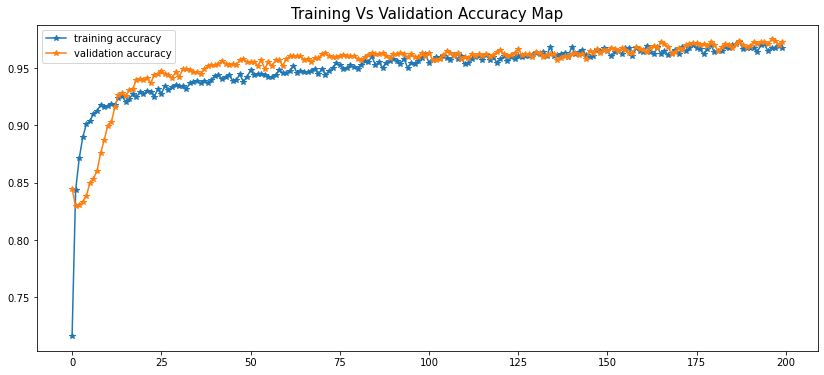

In [25]:
#training and validation accuracy as per the each ephoce
plt.figure(figsize=(14,6))
plt.plot(result.history['accuracy'],marker='*',label='training accuracy')
plt.plot(result.history['val_accuracy'],marker='*',label='validation accuracy')
plt.title("Training Vs Validation Accuracy Map", y=1, fontdict={"fontsize": 15})
plt.legend()
plt.show()

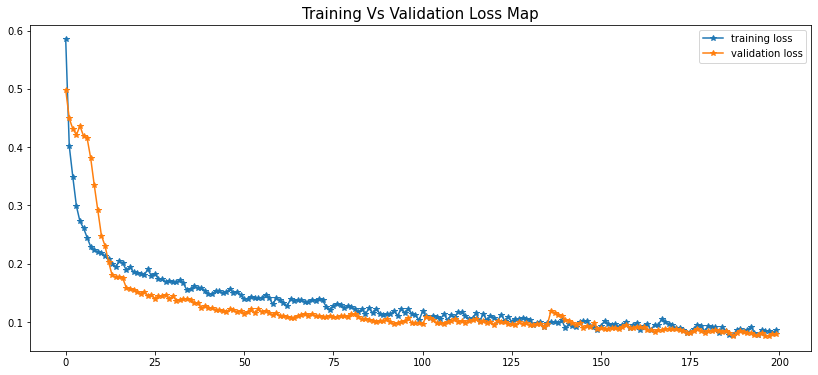

In [26]:
#training and validation loss as per the each ephoce
plt.figure(figsize=(14,6))
plt.plot(result.history['loss'],marker='*',label='training loss')
plt.plot(result.history['val_loss'],marker='*',label='validation loss')
plt.title("Training Vs Validation Loss Map", y=1, fontdict={"fontsize": 15})
plt.legend()
plt.show()

<b>Observation:</b> ANN model with 3 dence layer generated the result with <font color="green">97%</font> accuracy

In [27]:
predictions=model.predict_classes(X_test)
print(f"\033[1mClassification Report:\033[0m\n{22 * '-'}\n",confusion_matrix(y_test,predictions),"\n")
print(f"\033[1mClassification Report:\033[0m\n{22 * '-'}\n",classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Classification Report:
----------------------
 [[ 323   40]
 [  13 1540]] 

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       363
           1       0.97      0.99      0.98      1553

    accuracy                           0.97      1916
   macro avg       0.97      0.94      0.95      1916
weighted avg       0.97      0.97      0.97      1916



******************************************************************************


<b>Conclution</b>

<b>ANN model with 3 dence layer generated the result with <font color="green">97%</font> accuracy<br></b>

<u>Observations:</u>
<ul type="circle">
<li>The data did <font color="blue">not contain any missing values</font>. Therefore, imputation was not required</li>
<li>Loan request for debt consolidation is high and followed by credit cards</li>
<li>About <font color="red">25.95%</font> of the education purpose loans are termed  <font color="red">Risky</font> followed by all other purposes with <font color="red">21.28%</font> and small business with <font color="red">20.03%</font></li>
<li>The average interest rate for the <font color="red">Risky loans</font> is around <font color="red">2% higher</font> than the healthy loans</li>
<li>The Debt to Income ratio is <font color="red">higher</font> for the <font color="red">Risky loans</font></li>
<li>There are <font color="blue">no strong correlation between features</font> and hence not dropping any features from dataset</li>
<li>The higher the FICO score, the lower the interest rates. Also, the higher credit score have better risk credibility. However, there are a few cases where lower interest rates were offered even though the FICO score was very poor. One possibility is if there hase been a compromise to adhere to the policy of loan disbursement and favours been granted</li>
</ul>

# End of project